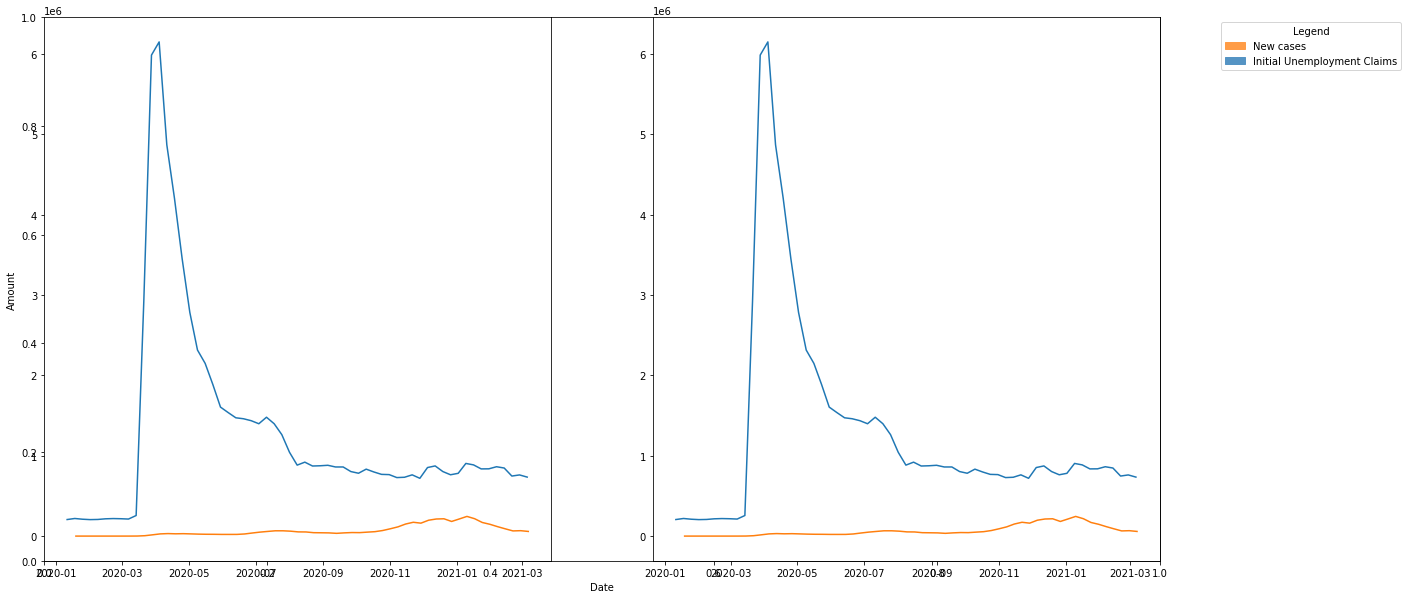

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import requests

API_KEY = "a964732354e30d669470642ff6b45f4c"

fed_api_settings = {
    'series_id': 'ICSA',
    'file_type': 'json',
    'sort_order': 'desc',
    'observation_start': "2020-01-07", # Trying to match the static end/start dates
    'observation_end': "2021-03-07",   # provided by the Covid tracker.
    'limit': '1300'
}

# Grabs weekly numbers.
def getFedData(settings):
    headers = "?series_id=" + settings['series_id'] + "&api_key=" + API_KEY + "&file_type=" + settings['file_type'] + "&sort_order=" + settings['sort_order'] + "&observation_start=" + settings['observation_start'] + "&observation_end=" + settings['observation_end'] + "&limit=" + str(settings['limit'])
    url = "https://api.stlouisfed.org/fred/series/observations" + headers
    df = pd.read_json(url)
    ndf = pd.DataFrame()
    for group, row in df.iterrows():
        ndf.loc[group, 'date'] = pd.to_datetime(df.iloc[group]['observations']['date'])
        ndf.loc[group, 'total_new_claims'] = int(df.iloc[group]['observations']['value'])
    ndf.set_index('date', inplace=True)
#     ndf.sort_index(ascending=True, inplace=True)
#     ndf.index = pd.to_datetime(ndf.index) # Fed data comes in weekly numbers.
    return ndf

def getCovidData():
    url = 'https://api.covidtracking.com/v1/us/daily.csv'
    df = pd.read_csv(url)
    ndf = pd.DataFrame()
    for group, row in df.iterrows():
        date = row['date']
        date = str(date)
        year = date[0:4]
        day = date[4:6]
        month = date[6:8]
        date = year + '-' + day + '-' + month
        ndf.loc[group, 'date'] = pd.to_datetime(date)
        positive_cases = row['positiveIncrease']
        ndf.loc[group, 'positive_cases'] = positive_cases
    ndf.dropna(inplace=True)
    ndf['positive_cases'] = ndf['positive_cases'].apply(int)
    ndf.set_index('date', inplace=True)
#     ndf.sort_index(ascending=True, inplace=True)
    ndf = ndf.resample('W').mean()
    return ndf

def visualize():
    fedData = getFedData(fed_api_settings)
    covidData = getCovidData()
    
#     fig, ax = plt.subplots()
#     ax.plot(fedData)
#     ax.plot(covidData)
    
    fig = plt.figure(figsize=(20,10))
    
    blue = mpatches.Patch(color='#5594c4', label='Initial Unemployment Claims')
    red = mpatches.Patch(color='#ff9c46', label='New cases')
    
    plt.legend(handles=[red, blue], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(fedData)
    ax1.plot(covidData)
    
    ax2 = fig.add_subplot(1, 2, 2)    
    ax2.plot(fedData)
    ax2.plot(covidData)
    
visualize()